In [33]:
import re
import torch
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

**Load the LansinghChadda Movie review scrapped from the IMDb website.**

In [19]:
review_df=pd.read_csv('LalSinghChadda-Reveiw.csv')
review_df.head()

,review
0,Lal Singh Chadda is a masterpiece & must watch...
1,After a long time watched a Good Movie but Cou...
2,People are reviewing it negatively without eve...
3,"It's the story of a man, who didn't have a mas..."
4,No way closer to original. Acting is literally...


In [20]:
review_df['review'][3]

"It's the story of a man, who didn't have a master plan, took each day as it was given, if you erred you'd be forgiven, loved his family and his friends, didn't fake, feign or pretend, full of love and dedication, reverence and adoration.You can easily put the origins of this to one side and enjoy a piece of cinema that is still unique in many ways. The central performance from Aamir Khan is delightful, the supporting roles just as good and the messages and meanings as intense as any from a film that asks you to consider the way you perceive and see the world, and whether there might be anything you can do to make it better for those around you."

**Load the pretrained BERT model from hugging face**
https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [21]:
Tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Pretrained_model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [22]:
tokens = Tokenizer.encode(review_df['review'][3], return_tensors='pt')
result = Pretrained_model(tokens)
result.logits
print(int(torch.argmax(result.logits)))

3


In [26]:
def sentiment_score(review):
    tokens = Tokenizer.encode(review, return_tensors='pt')
    result = Pretrained_model(tokens)
    return int(torch.argmax(result.logits))+1

In [27]:
review_df['sentiment_score']=review_df['review'].apply(lambda x: sentiment_score(x[:25]))

In [29]:
review_df.head(25)

,review,sentiment_score
0,Lal Singh Chadda is a masterpiece & must watch...,3
1,After a long time watched a Good Movie but Cou...,4
2,People are reviewing it negatively without eve...,3
3,"It's the story of a man, who didn't have a mas...",4
4,No way closer to original. Acting is literally...,1
5,Remaking a cult classic like Forrest Gump is a...,5
6,Worst movie ever made dont waste money if you ...,1
7,"I normally do not review films here on Imdb, b...",2
8,It's not the Amir's best movie for certain but...,3
9,Not worth wasting money. Better watch Hollywoo...,1


In [30]:
review_df['sentiment_score'].value_counts()

sentiment_score
1    10
3     6
5     5
4     3
2     1
Name: count, dtype: int64

**Analyzing the sentiment score using count plot**

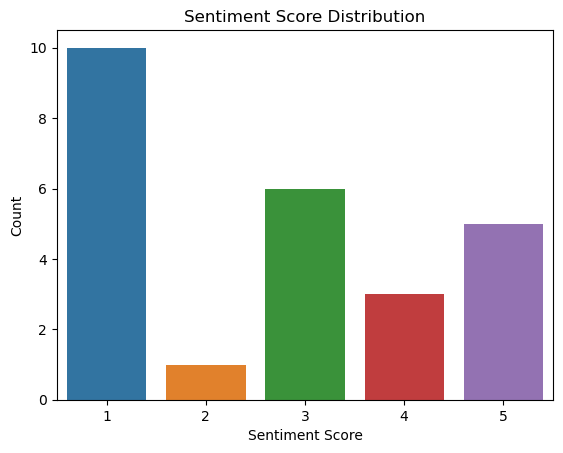

In [34]:
sns.countplot(data=review_df, x='sentiment_score')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

plt.show()